# t-Tests

***

In [2]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

## Normal Distribution

***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac{x - \mu}{\sigma}\big)^2 } $

In [3]:
# Calculate the Probability Density Function
# in the formula e means the exponential function
def normal_pdf(x, mu=0.0, sigma=1.0):
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

**Standard Normal**

$\mu = 0$ and $\sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} x^2 } $

In [4]:
# Middle of the standard normal pdf.
normal_pdf(0.0)

0.3989422804014327

In [5]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line.
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

0.8920620580763857

In [6]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line.
normal_pdf(0.0, mu=-2.0, sigma=np.sqrt(0.5))

0.010333492677046035

## Plots

***

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

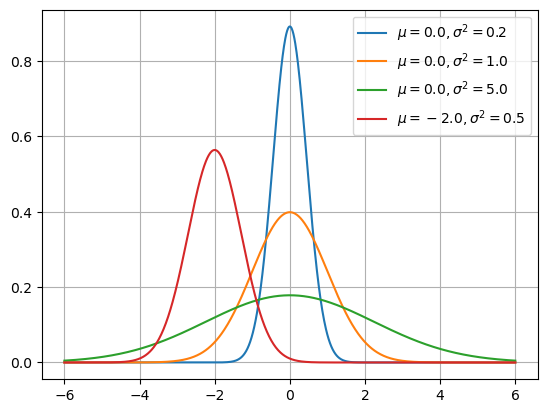

In [7]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-6.0, 6.0, 1001)

# Plot various values for pdf.
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$') # add labels for legend

# Add a legend.
ax.legend()

# Add a grid.
ax.grid()

## Area Under the Curve

***

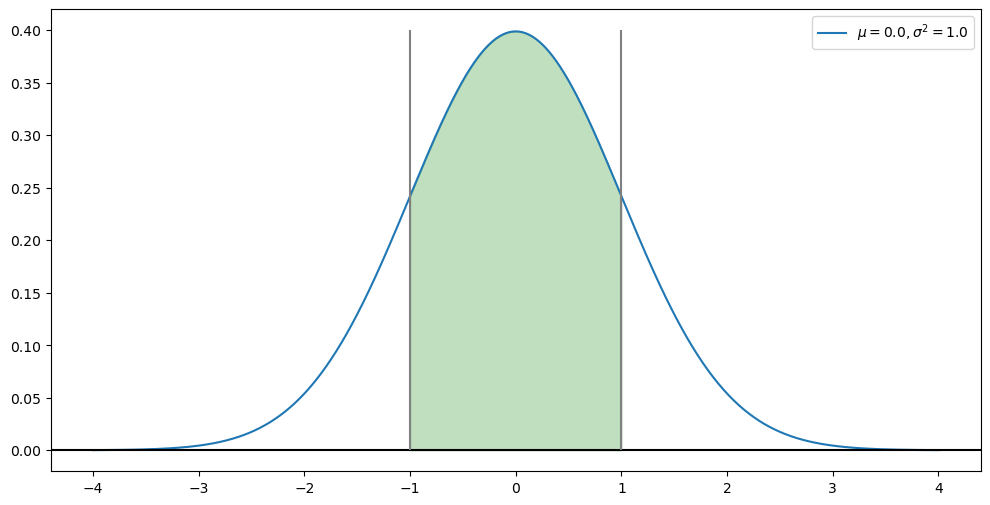

In [8]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12,6))

# Range of x values. REturns evenly spaced numbers over a specified interval.
x = np.linspace(-4.0, 4.0, 1001) # start, stop and number of samples

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis. Adds a horizontal line at 0
ax.axhline(0.0, color='black')

# Add vertical lines at 1 & -1 going up to 0.4.
ax.vlines([-1.0, 1.0], 0.0, 0.4, color="grey")

# x values between the vertical lines.
x_interval = np.linspace(-1.0, 1.0, 101)

# Shade the area under the blue curve between the vertical lines.
ax.fill_between(x_interval, normal_pdf(x_interval), color='green', alpha=0.25) # alpha makes the colour a little more transparent

# Add a legend.
ax.legend();

In [9]:
# The intersection of the grey and blue lines.
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'( 1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
( 1.0, 0.24197072451914337)


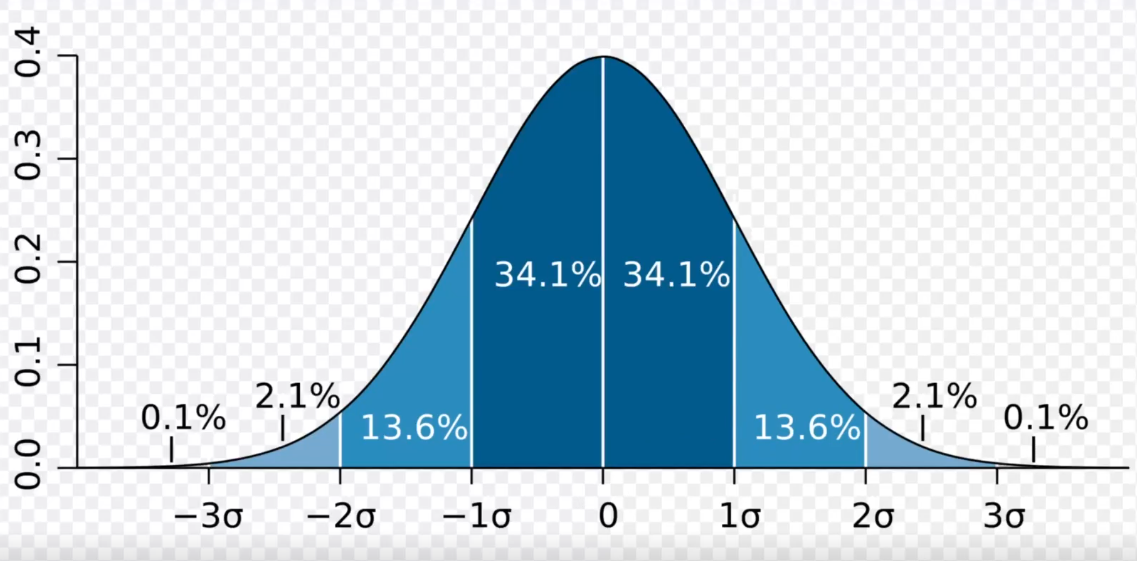

For Normal disrtibution approximately 68.27% of data lies within 1 standard deviation of the mean. Approximately 95.4% of data lies within 2 standard deviations of the mean and approximately 99.6% of data lies within 3 standard deviations of the mean.

## Normal Data

***

In [10]:
# Generate some random normal data.
random_data = np.random.standard_normal(100000)

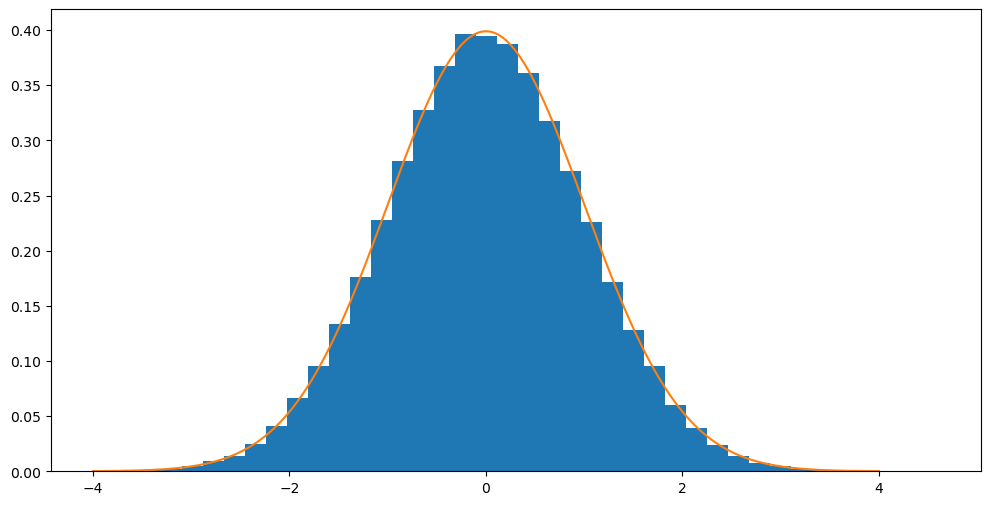

In [11]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot a histogram of the data.
# Density = true changes the y axis from count to 
# percentage (count of each bin/total number of count)
ax.hist(random_data, bins=40, density=True)

# Plot the pdf for the standard normal distribution to check if it is 
# a standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');



## Sampling Distribution

***

In [37]:
# Generate some random normal data. Each value is from a standard normal distributons 
# All parameters (e.g., mean, variance, standard deviation, etc) are equal
# Each value is independent of each other.
# IID: Independent and Identically distributed
random_data = np.random.standard_normal((10000, 25))

# Show.
random_data

array([[ 0.85338393,  2.0406012 ,  0.68527662, ..., -0.25315621,
         1.36786741,  1.15689764],
       [ 0.63686337,  0.84070965, -0.27348897, ..., -0.66763739,
        -0.88203054, -1.96608438],
       [ 1.96518617, -0.40206939,  0.72392143, ..., -0.18570771,
         1.12218823, -1.32294038],
       ...,
       [ 0.49437316,  0.2992749 ,  0.26930159, ...,  0.11740735,
        -2.25883084, -1.03477307],
       [-0.01160154,  0.25179877, -0.596293  , ..., -1.61221598,
        -1.99028588, -1.06090865],
       [ 2.77308198, -0.61847893, -0.65650918, ..., -1.70755212,
         0.48955442,  0.18832611]])

In [49]:
# Mean across the rows.
#random_data.mean() # Mean of all the values
random_data.mean(axis=1) # Mean of each of the rows

array([-2.45361213, -2.34668876, -2.69583467, ..., -2.24971757,
       -2.40858032, -2.40337422])

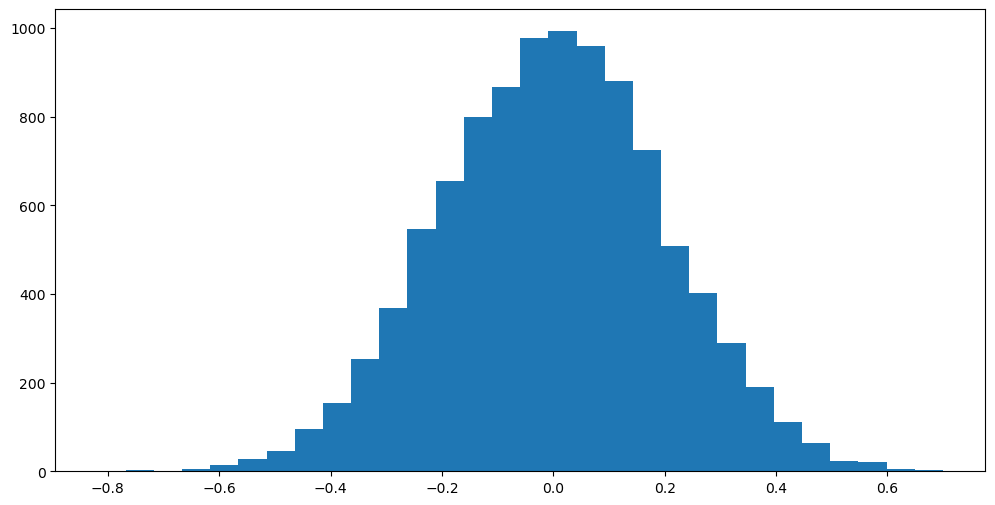

In [39]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30);

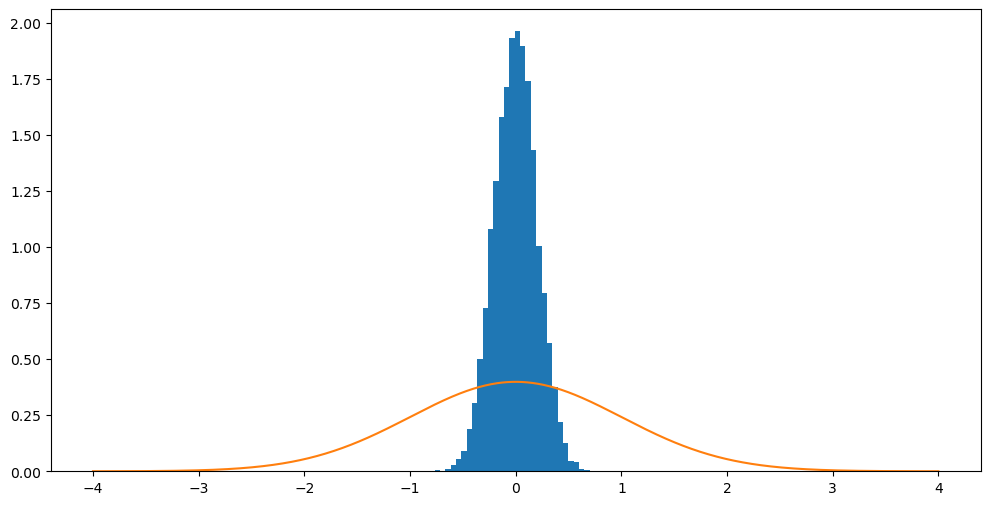

In [40]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
# density =true makes the y axis percentages instead of count. Remove this to see 
# that 'orange' plot is virtually illegible.
# It looks ike some there is 200% of the values in some bins. That is not the case.
# You have to  multiply the value (200%) by the width of each bin (Looks like they 
# are # roughly 0.1 wide)
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y);

Why does the below green curve (sigma = 0.2) fit the histogram

The formula for standard error is:

$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $

$\sigma$ = 1 $n$ = 25

$\sigma_{\bar{x}} = \frac{1}{\sqrt{25}} = 0.2$


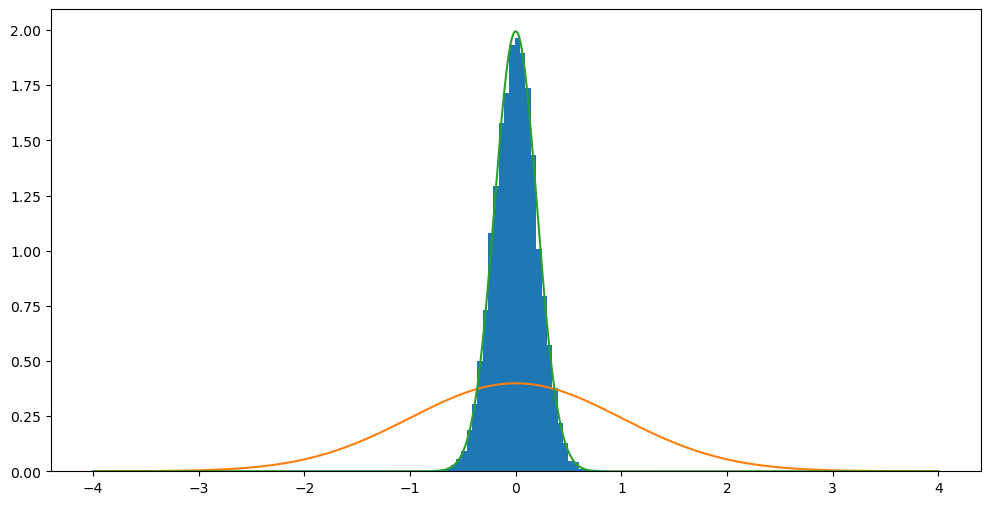

In [41]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot normal distribution with mu = 0.0 and sigma = 0.2.
# (not standard normal distribution because sigma != 1).
# The normal distribution 
y = normal_pdf(x, mu=0.0, sigma=0.2)
ax.plot(x, y);

## Random Normal

***

In [42]:
# Let's pick a random mean value.
# Uniform gives every value an even chance
random_mu = np.random.uniform(-3.0, 3.0)

# Show.
# random_mu

In [43]:
# Generate some random normal data with this unknown mu.
# Same amoutn of data as before.
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show.
random_data

array([[-2.46695912, -1.34688868, -4.3463071 , ..., -1.60211489,
        -2.3888569 , -1.1355077 ],
       [-0.6903833 , -2.89932601, -4.14209584, ..., -1.4441691 ,
        -3.04040457, -0.79253473],
       [-1.13677176, -2.93552102, -2.5186797 , ..., -3.69496802,
        -2.81466523, -3.54910409],
       ...,
       [-2.57408848, -2.38838581, -3.02652523, ..., -2.63513423,
        -1.83091146, -2.00380875],
       [-3.49336252, -0.52868603, -0.99315853, ..., -2.41496433,
        -2.14231899, -2.82378141],
       [-4.12989509, -2.99421618, -0.94483458, ..., -2.88159685,
        -3.16440919, -2.47720877]])

(array([1.71746010e-03, 0.00000000e+00, 0.00000000e+00, 1.71746010e-03,
        3.43492020e-03, 1.71746010e-02, 2.74793616e-02, 4.98063430e-02,
        1.23657127e-01, 2.61053936e-01, 4.70584068e-01, 7.04158642e-01,
        1.00814908e+00, 1.29668238e+00, 1.69513312e+00, 1.96820928e+00,
        1.97507912e+00, 1.88405373e+00, 1.67280614e+00, 1.33618396e+00,
        9.77234798e-01, 7.29920543e-01, 4.01885664e-01, 2.91968217e-01,
        1.40831728e-01, 7.90031647e-02, 3.09142818e-02, 1.37396808e-02,
        8.58730051e-03, 3.43492020e-03]),
 array([-3.19442718, -3.13620167, -3.07797615, -3.01975063, -2.96152512,
        -2.9032996 , -2.84507409, -2.78684857, -2.72862306, -2.67039754,
        -2.61217202, -2.55394651, -2.49572099, -2.43749548, -2.37926996,
        -2.32104445, -2.26281893, -2.20459342, -2.1463679 , -2.08814238,
        -2.02991687, -1.97169135, -1.91346584, -1.85524032, -1.79701481,
        -1.73878929, -1.68056377, -1.62233826, -1.56411274, -1.50588723,
        -1.44766

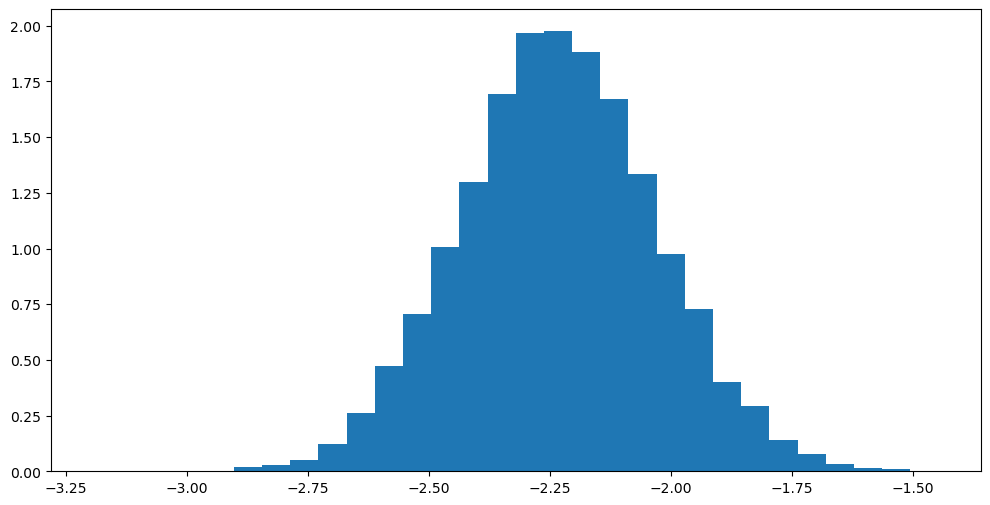

In [44]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

In [45]:
# Estimate random_mu from above histogram.
# It will be roughly in the missle of the histogram at it's peak.
# Now look at the value.
random_mu

-2.2314299668529554

In [46]:
# A random sample of size 50.
# Parameters are mu and sigma (mean and standard deviation)
# These values will be based on random_mu calculated above.
sample = np.random.normal(random_mu, 1.0, 50)

# Show.
sample

array([-2.3540395 , -2.7787052 , -2.60922596, -2.41277009, -1.21196128,
       -2.83179882, -1.90078178, -3.27004198, -2.38102865, -2.92752896,
       -2.2181531 , -3.05545836, -2.30396305, -1.31761235, -1.57031862,
       -2.18496825, -2.72828524, -1.93793548, -2.28468578, -0.60517437,
       -1.80984876, -1.92537229, -2.08225676, -2.36891877, -4.07377931,
       -0.70346869, -4.97135348, -1.4430873 , -1.50182973, -2.3351325 ,
       -0.99781846, -2.36350234, -2.94688052, -2.6200793 , -3.89909213,
       -1.95060351, -1.95711728, -0.83599382, -0.7980041 , -3.23056292,
       -1.93321426, -1.86356845, -2.18799177, -2.81855321, -2.79719433,
       -2.90619403, -0.51437586, -3.53928896, -1.3984823 , -1.97994121])

In [51]:
# Calculate the mean of the sample.
# It should be close to random_mu.
# This is called the statistic, used to estimate a parameter
sample.mean()

-2.232758863107553

## Independent Samples t-test

***

In [50]:
# Load Iris.
df = pd.read_csv('../data/iris.csv')

# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Setosa petal length.
sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [ ]:
# Virginica petal length.
sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [ ]:
# t-test.
ss.ttest_ind(sample_a, sample_b)

TtestResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71, df=98.0)

***

## End